In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [106]:
STUDENT_ID = "PES2UG23CS350"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [107]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS350
Polynomial Type: QUADRATIC: y = 1.10x² + 6.58x + 13.95
Noise Level: ε ~ N(0, 1.78)
Architecture: Input(1) → Hidden(72) → Hidden(32) → Output(1)
Learning Rate: 0.001
Architecture Type: Wide-to-Narrow Architecture


# DATASET GENERATION - DO NOT MODIFY

In [108]:
np.random.seed(assignment["student_seed"])

n_samples = 15000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 15,000 samples generated and saved!
Training samples: 12,000
Test samples: 3,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [109]:
def relu(z):
  #Todo implement the Relu formula
  return np.maximum(0, z)

def relu_derivative(z):
  #Todo implement the Relu derivative formula
  return (z > 0).astype(float)


# LOSS FUNCTION- TODO: IMPLEMENT

In [110]:
def mse_loss(y_true, y_pred):
  #Todo implement the MSE formula
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

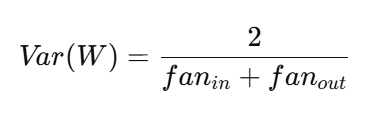


##Two common forms:  

#**Normal distribution:**  
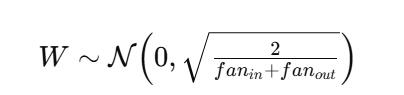

#**Uniform distribution:**  
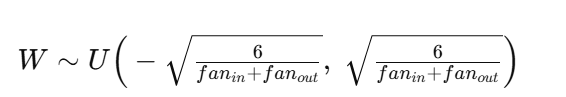

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [111]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """Xavier/Glorot normal initialization for 3-layer MLP.
    Returns W1,b1,W2,b2,W3,b3 with biases initialized to zeros.
    """
    def xavier_std(fan_in, fan_out):
        return np.sqrt(2.0 / (fan_in + fan_out))

    # Use assignment seed if available for reproducibility, else default RNG
    seed = None
    if 'assignment' in globals() and isinstance(assignment, dict):
        seed = assignment.get('student_seed', None)
    rng = np.random.RandomState(seed)

    W1 = rng.randn(input_dim, hidden1) * xavier_std(input_dim, hidden1)
    b1 = np.zeros((1, hidden1))

    W2 = rng.randn(hidden1, hidden2) * xavier_std(hidden1, hidden2)
    b2 = np.zeros((1, hidden2))

    W3 = rng.randn(hidden2, output_dim) * xavier_std(hidden2, output_dim)
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3


# FORWARD PROPAGATION - TODO: IMPLEMENT

In [112]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """Forward pass for architecture:
    Input -> Hidden1 (ReLU) -> Hidden2 (ReLU) -> Output (linear)
    Returns intermediate linear/activations: z1, a1, z2, a2, z3
    where z3 is the network output (before any inverse-scaling).
    """
    # Linear transform into first hidden layer
    z1 = np.dot(X, W1) + b1  # shape: (n_samples, hidden1)
    a1 = relu(z1)

    # Second hidden layer
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    # Output layer (linear)
    z3 = np.dot(a2, W3) + b3  # shape: (n_samples, output_dim)

    return z1, a1, z2, a2, z3


# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [113]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """Compute gradients for all weights and biases using MSE loss and ReLU activations.
    Returns: dW1, db1, dW2, db2, dW3, db3 with shapes matching W's and b's.
    """
    n = X.shape[0]
    # Ensure arrays
    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)

    # dL/dY_pred for MSE = (2/n) * (Y_pred - Y_true)
    dL_dYpred = (2.0 / n) * (Y_pred - Y_true)  # shape: (n, output_dim)

    # Gradients for W3 and b3 (output layer)
    dW3 = np.dot(a2.T, dL_dYpred)  # (hidden2, output_dim)
    db3 = np.sum(dL_dYpred, axis=0, keepdims=True)  # (1, output_dim)

    # Backprop into second hidden layer
    dA2 = np.dot(dL_dYpred, W3.T)  # (n, hidden2)
    dZ2 = dA2 * relu_derivative(z2)  # (n, hidden2)

    dW2 = np.dot(a1.T, dZ2)  # (hidden1, hidden2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)  # (1, hidden2)

    # Backprop into first hidden layer
    dA1 = np.dot(dZ2, W2.T)  # (n, hidden1)
    dZ1 = dA1 * relu_derivative(z1)  # (n, hidden1)

    dW1 = np.dot(X.T, dZ1)  # (input_dim, hidden1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)  # (1, hidden1)

    return dW1, db1, dW2, db2, dW3, db3


# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [114]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """Train the 3-layer neural network using simple batch gradient descent.
    Uses global variables 'hidden1', 'hidden2' and 'learning_rate' if available.
    Returns best_weights (tuple), train_losses (list), test_losses (list).
    """
    # Ensure 2D shapes
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)

    if Y_train.ndim == 1:
        Y_train = Y_train.reshape(-1, 1)
    if Y_test.ndim == 1:
        Y_test = Y_test.reshape(-1, 1)

    input_dim = X_train.shape[1]
    output_dim = Y_train.shape[1]

    # Get architecture hyperparams from globals if present, else sensible defaults
    h1 = globals().get('hidden1', 16)
    h2 = globals().get('hidden2', 8)
    lr = globals().get('learning_rate', 0.7)

    # Initialize weights
    W1, b1, W2, b2, W3, b3 = xavier_initialization(input_dim, h1, h2, output_dim)

    train_losses = []
    test_losses = []

    best_test_loss = float('inf')
    best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
    patience_counter = 0

    for epoch in range(epochs):
        # Forward pass (training)
        z1, a1, z2, a2, y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        train_loss = mse_loss(Y_train, y_pred_train)
        train_losses.append(train_loss)

        # Validation / test loss
        _, _, _, _, y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, y_pred_test)
        test_losses.append(test_loss)

        # Backward pass (compute gradients on training data)
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, y_pred_train, W2, W3)

        # Gradient descent parameter update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3

        # Early stopping logic
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} — train_loss: {train_loss:.6f}, test_loss: {test_loss:.6f}, best_test_loss: {best_test_loss:.6f}")

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses


# EXECUTE TRAINING

In [115]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

# Unpack best weights so the rest of the notebook can use W1,b1,...
W1, b1, W2, b2, W3, b3 = weights
print("Training complete. Best model weights unpacked into W1,b1,W2,b2,W3,b3")

Training Neural Network with your specific configuration...
Epoch 1/500 — train_loss: 0.985184, test_loss: 1.010660, best_test_loss: 1.010660
Epoch 50/500 — train_loss: 0.939854, test_loss: 0.963076, best_test_loss: 0.963076
Epoch 100/500 — train_loss: 0.900408, test_loss: 0.921776, best_test_loss: 0.921776
Epoch 150/500 — train_loss: 0.864590, test_loss: 0.884398, best_test_loss: 0.884398
Epoch 200/500 — train_loss: 0.831278, test_loss: 0.849761, best_test_loss: 0.849761
Epoch 250/500 — train_loss: 0.800074, test_loss: 0.817470, best_test_loss: 0.817470
Epoch 300/500 — train_loss: 0.770246, test_loss: 0.786727, best_test_loss: 0.786727
Epoch 350/500 — train_loss: 0.741316, test_loss: 0.756980, best_test_loss: 0.756980
Epoch 400/500 — train_loss: 0.713112, test_loss: 0.728040, best_test_loss: 0.728040
Epoch 450/500 — train_loss: 0.685524, test_loss: 0.699785, best_test_loss: 0.699785
Epoch 500/500 — train_loss: 0.658484, test_loss: 0.672142, best_test_loss: 0.672142
Training complete. 

# RESULTS VISUALIZATION

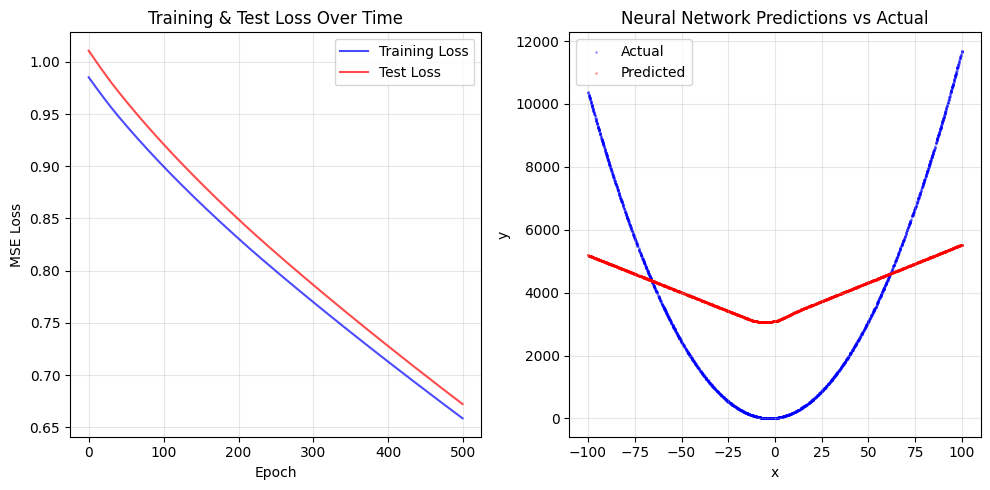

In [116]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [117]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 5,290.98
Ground Truth (formula):    9,577.49
Absolute Error:            4,286.51
Relative Error:            44.756%


# PERFORMANCE METRICS

In [118]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.658484
Final Test Loss:     0.672142
R² Score:           0.3460
Total Epochs Run:   500
